## Alice spring: 2016, 2017, 2018 

In [1]:
#! pip install SALIb

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np


In [3]:
### running SAlib example:

In [4]:
from IPython.display import HTML, display
from sympy import diff, init_printing
import argparse
import csv
init_printing() 
init_printing(use_latex='mathjax')  # This causes mathjax to render all output
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

!pip install statsmodels

In [6]:
from sys import stdout       # For printing progress of computations
import numpy as np
import pandas as pd
import scipy as sc
import glob
import statsmodels.api as sm
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
from sklearn import metrics
import calendar
from sympy.printing.theanocode import theano_function

In [7]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
from itertools import chain



In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
import xarray as xr
from sympy.physics.units import convert_to
#import matplotlib
#from matplotlib import rc
import numpy as np
from pandas import Timestamp
from essm import Eq, e
from essm.equations import Equation
from essm.variables import Variable
from essm.variables.utils import generate_metadata_table
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt 

In [10]:
import glob
from netCDF4 import Dataset
import os

filelist = ['arr[0]', 'arr[1]', 'arr[2]']
ncfile = xr.open_mfdataset(filelist)

In [11]:
path = '../Data/tern/AS' 
#print(path)
    
ncfile = xr.open_mfdataset(path +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray v

In [12]:
HWframe= ncfile.to_dataframe()
HWframe.index=HWframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
HWframe.reset_index(inplace=True)
HWframe.index=HWframe.time 
HWframe=HWframe[(HWframe.Ws_QCFlag==00)&(HWframe.Fld_QCFlag==00)&(HWframe.Flu_QCFlag==00)&(HWframe.Fh_QCFlag==00)
               &(HWframe.Ta_QCFlag==00)]
HWframe=HWframe.replace(-9999.000000, np.nan)
HWframe["T_a"] = pd.Series(HWframe.Ta + 273.15, index=HWframe.index)

In [13]:
plt_path= '../Plots'

### prec:

In [14]:
df_prec=HWframe[['Precip']]
df_prec1=df_prec.resample('D').sum()
#df_prec1

## SEB correction

In [15]:
Beta = (HWframe.Fh)/(HWframe.Fe)
HWframe["beta"] = Beta

dLE=(HWframe.Fn - HWframe.Fg - (1+ HWframe.beta)*HWframe.Fe)/(1+ HWframe.beta)
HWframe["dLE"] = dLE
HWframe["Fe_corr"] = HWframe.dLE + HWframe.Fe
HWframe["dH"] = (HWframe.dLE + HWframe.Fe)* Beta - HWframe.Fh
HWframe["Fh_corr"] = HWframe.Fh + HWframe.dH

#dH=

## variables :

In [16]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9
class eps_r (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{r}'
    #default = 0.9
class eps_b (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{b}'
    #default = 0.9
        
    
    
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.67 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

In [17]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

                         4    
Rₗₒᵤₜ = Rₗᵢₙ⋅(1 - ε) + Tₛ ⋅ε⋅σ

In [18]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[1][T_s])
eq_Ts_Rlout_Rlin

           _____________________
          ╱ Rₗᵢₙ   Rₗᵢₙ   Rₗₒᵤₜ 
Tₛ = ⅈ⋅4 ╱  ──── - ──── + ───── 
       ╲╱    σ     ε⋅σ     ε⋅σ  

In [19]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

         _____________________
        ╱ Rₗᵢₙ   Rₗᵢₙ   Rₗₒᵤₜ 
Tₛ = 4 ╱  ──── - ──── + ───── 
     ╲╱    σ     ε⋅σ     ε⋅σ  

In [20]:
HWframe["T_a"] = pd.Series(HWframe.Ta + 273.15, index=HWframe.index)

tf_Ts = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
list_Ts = tf_Ts(HWframe.Flu,HWframe.Fld)
print(list_Ts)


## surface temperature calculation: ignoring reflected / SBlaw

In [21]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


          4    
Rₗₒᵤₜ = Tₛ ⋅ε⋅σ

In [22]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

         _______
        ╱ Rₗₒᵤₜ 
Tₛ = 4 ╱  ───── 
     ╲╱    ε⋅σ  

### for modis eps

In [23]:
class epsilon_mod (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon_{modis}'
    #default = 0.9

In [24]:
#generate_metadata_table([])

## opt eps using OLS: considering reflected

plt_path= '/home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/plots/'

In [25]:
opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
def opteps_OLS_loop (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', 
                     eqdigits=3, epsmin=0.7, epsmax=0.999, epsincr=0.002):
    
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
       
        
        list_T_s = tf_T_s((df.Fld),(df.Flu)) # both longwave are overestimated by 5 watt/m2
        
        df = df.assign(T_s=list_T_s)
        #ycol = (df.Fh +30  )
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a))
        ####
       
        #####
        df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
            opteps_As_ref.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As_ref.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
    
    df_eps_ref=opteps_As_ref.copy()
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
   
    return df_eps_ref.eps_ref.iloc[0],df_eps_ref
        

In [26]:
opteps_OLS_loop (2017, HWframe,10)

(0.8220000000000001,
           RMSE          m  eps_ref        R2
 61   67.970893  31.122613    0.822  0.759055
 60   67.972239  30.950010    0.820  0.759046
 62   67.973049  31.296269    0.824  0.759040
 59   67.977016  30.778454    0.818  0.759012
 63   67.978780  31.470987    0.826  0.758999
 ..         ...        ...      ...       ...
 145  88.486439  50.049716    0.990  0.591657
 146  89.079693  50.333199    0.992  0.586163
 147  89.683451  50.618020    0.994  0.580534
 148  90.297782  50.904169    0.996  0.574768
 149  90.922756  51.191631    0.998  0.568861
 
 [150 rows x 4 columns])

### opt eps plot

In [27]:
def opteps_OLS_months2 (years, df,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3,):
    
    df_all = HWframe.copy()
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
        &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
   
        
        
    list_T_s = tf_T_s(df.Fld, df.Flu ) # both longwave are underestimated by 5 watt/m2
   
    df = df.assign(T_s=list_T_s)
    #list_H = (df.Fh  30)
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
   
        #####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
        
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))
    #plt.plot(df12.DT2,df12.fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.xticks([-5,0,5,10,15])
    
    plt.xlim(0, 15)
    plt.ylim(0, 500)
        
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

41.925461390195515


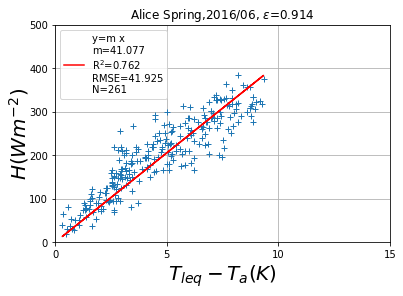

41.925461390195515


In [28]:
opteps_OLS_months2( 2016,HWframe,6,0.914)

54.73505240124359


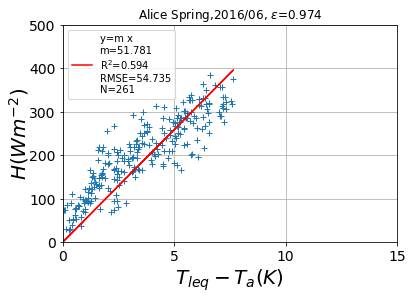

54.73505240124359


In [29]:
opteps_OLS_months2( 2016,HWframe,6,0.974)

## Yearly epsilon:

52.34964711654415


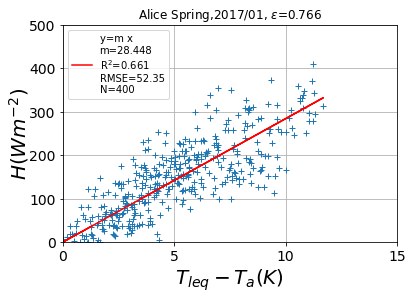

52.34964711654415
44.50695742844667


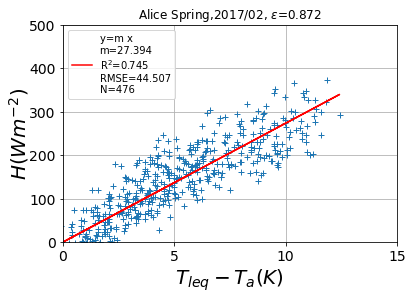

44.50695742844667
43.62101759806042


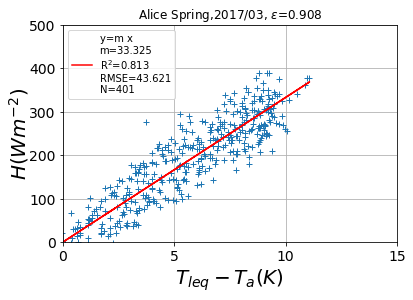

43.62101759806042
48.78798623883036


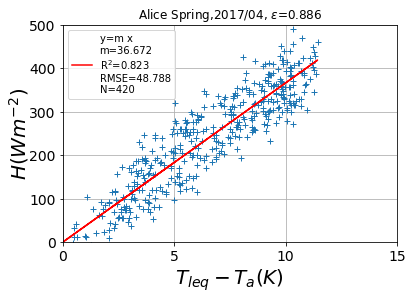

48.78798623883036
47.11366455111613


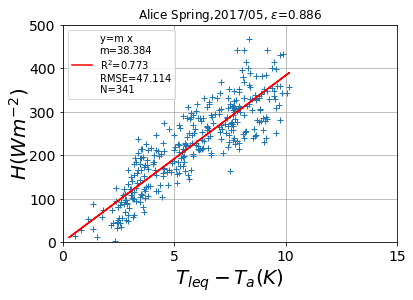

47.11366455111613
42.12454589930604


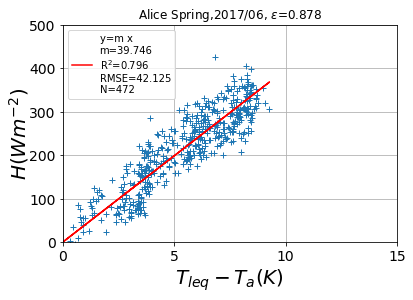

42.12454589930604
39.09832652413563


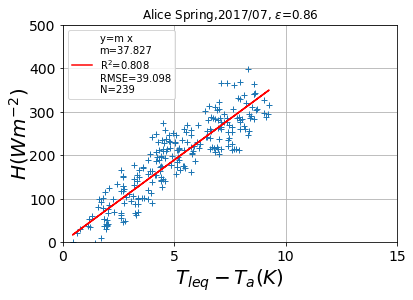

39.09832652413563
40.8734933249031


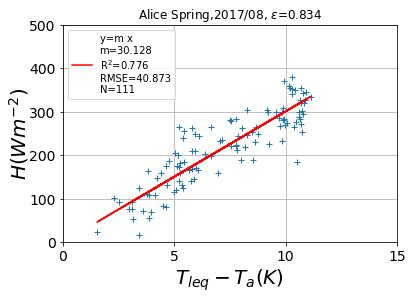

40.8734933249031
53.38824703105006


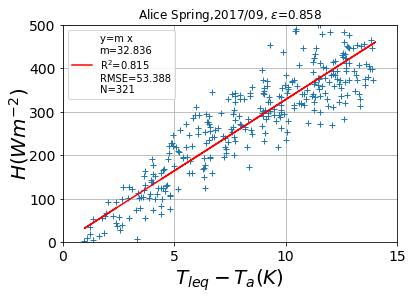

53.38824703105006
67.97089267631475


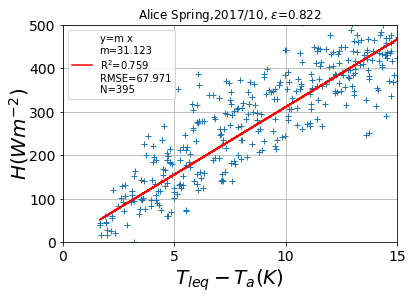

67.97089267631475
58.61741649085814


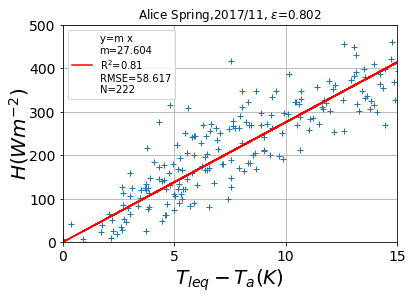

58.61741649085814
58.6792340688723


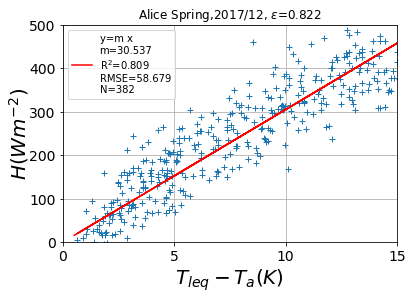

58.6792340688723


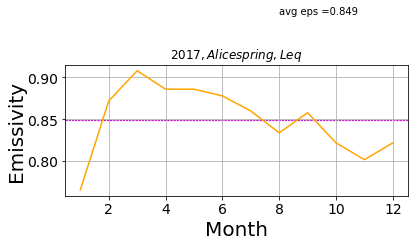

In [30]:
yr=2017
mnth=0
eqdigits=3

list_opt_epsref1=[]
for i in range(12):
    mnth=i+1
    opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    opt_eps1 = opteps_OLS_loop(yr, HWframe,mnth)
    opt_eps=opt_eps1[0]
    
    if opt_eps<1:
        list_opt_epsref1.append(opt_eps)
        opteps_OLS_months2(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsref1.append(np.nan)
    
const=np.mean(list_opt_epsref1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsref1,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Leq$'.format(str(np.round(yr)))
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
#plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

***Checked for all months 0f 2017  and the epsilon,RMSE curve is smooth with different curvature for each month** 

In [31]:
#blah

## loop termination based on RMSE

0.8609999999999999


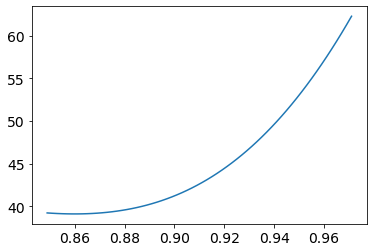

In [32]:
opteps_As_ref_ter = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
years=2017
df_all=HWframe
mnth=7
xcol = 'DT' 
ycol = 'Fh'
eqdigits=3
epsmin=0.7
epsmax=0.999
epsincr=-0.002
RMSE_check=0
k=0
epsilon1=np.arange(epsmax, epsmin, epsincr).tolist() # using array of the epsilon values
df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
for j in epsilon1 :
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, j).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
       
        
    list_T_s = tf_T_s((df.Fld),(df.Flu)) # both longwave are overestimated by 5 watt/m2
        
    df = df.assign(T_s=list_T_s)
        #ycol = (df.Fh +30  )
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
    
         #####
    df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    r2=r2_score(y,y_pred)
    if r2 > 0.5:
        opteps_As_ref_ter.loc[k]=[RMSE, m, j, r2]
    else:
        opteps_As_ref_ter.loc[k]=[np.nan, np.nan, 1, r2]
    df_eps_refter=opteps_As_ref_ter.copy()    
    if k > 1:
        if df_eps_refter.RMSE[k]- df_eps_refter.RMSE[k-1] > 0:
            RMSE_check=RMSE_check+1
        else:
            RMSE_check=0
    k=k+1
    if RMSE_check == 6:
        break
    #print(RMSE_check)   
    
df_eps_refter=opteps_As_ref_ter.copy()
plt.plot(df_eps_refter.eps_ref,df_eps_refter.RMSE)   
df_eps_refter.sort_values(by=['RMSE'],ascending=True,inplace=True)
print(df_eps_refter.eps_ref.iloc[0])
        

## to check optimisation direction

0.8600000000000001


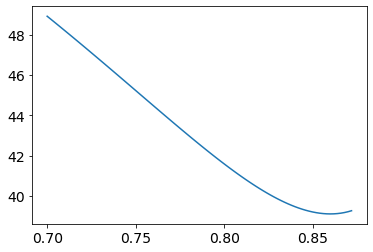

In [33]:
opteps_As_ref_ter = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
years=2017
df_all=HWframe
mnth=7
xcol = 'DT' 
ycol = 'Fh'
eqdigits=3
epsmin=0.7
epsmax=0.999
epsincr=0.002
RMSE_check=0
k=0
epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
for j in epsilon1 :
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, j).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
       
        
    list_T_s = tf_T_s((df.Fld),(df.Flu)) # both longwave are overestimated by 5 watt/m2
        
    df = df.assign(T_s=list_T_s)
        #ycol = (df.Fh +30  )
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
    
         #####
    df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    r2=r2_score(y,y_pred)
    if r2 > 0.5:
        opteps_As_ref_ter.loc[k]=[RMSE, m, j, r2]
    else:
        opteps_As_ref_ter.loc[k]=[np.nan, np.nan, 1, r2]
    df_eps_refter=opteps_As_ref_ter.copy()    
    if k > 1:
        if df_eps_refter.RMSE[k]- df_eps_refter.RMSE[k-1] > 0:
            RMSE_check=RMSE_check+1
        else:
            RMSE_check=0
    k=k+1
    if RMSE_check == 6:
        break
    #print(RMSE_check)   
    
df_eps_refter=opteps_As_ref_ter.copy()

plt.plot(df_eps_refter.eps_ref,df_eps_refter.RMSE)   
df_eps_refter.sort_values(by=['RMSE'],ascending=True,inplace=True)
print(df_eps_refter.eps_ref.iloc[0])
        

## function for RMSE

In [34]:
opteps_As_ref_ter = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])

In [35]:
opteps_As_ref_ter1 = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
def salib_git_RMSE(years,df_all,mnth,unc_H,unc_Fld,unc_Flu,unc_Ta,xcol = 'DT', ycol = 'Fh',eqdigits=3,
                       epsmin=0.7, epsmax=0.999, epsincr=-0.002):

    RMSE_check=0
    k=0
    epsilon1=np.arange(epsmax, epsmin, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in epsilon1 :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, j).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        list_H=df.Fh+unc_H
        df = df.assign(Fh=list_H)
        Fld1=df.Fld+unc_Fld
        #df = df.assign(Fld=Fld1)
        Flu1=df.Flu+unc_Flu
        #df = df.assign(Flu=Flu1)
        list_T_s = tf_T_s(Fld1,Flu1)
        
        df = df.assign(T_s=list_T_s)
        list_DT = df.T_s - (df.T_a+unc_Ta)
        df = df.assign(DT=list_DT)  
    
         #####
        df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1) 
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
            opteps_As_ref_ter1.loc[k]=[RMSE, m, j, r2]
        else:
            opteps_As_ref_ter1.loc[k]=[np.nan, np.nan, np.nan, r2]
        #df_eps_refter=opteps_As_ref_ter.copy()    
        #if k > 1:
         #   if df_eps_refter.RMSE[k]- df_eps_refter.RMSE[k-1] > 0:
          #      RMSE_check=RMSE_check+1
           # else:
            #    RMSE_check=0
        k=k+1
        #if RMSE_check == 5:
         #   break
        #print(RMSE_check) 
        #print(opteps_As_ref_ter1.eps_ref)
    
    df_eps_refter1=opteps_As_ref_ter1.copy()
    plt.plot(df_eps_refter1.eps_ref,df_eps_refter1.RMSE) 
    plt.show()
    plt.plot(df_eps_refter1.eps_ref,df_eps_refter1.R2)
    plt.show()
    df_eps_refter1.sort_values(by=['RMSE'],ascending=True,inplace=True)
    print(df_eps_refter1.eps_ref.iloc[0])

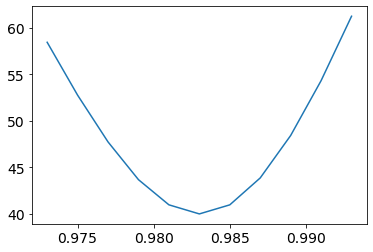

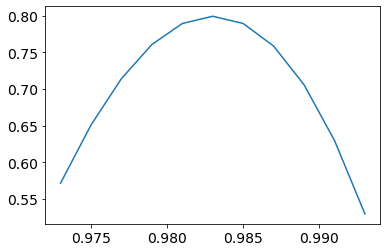

0.983


In [36]:
salib_git_RMSE(2017,HWframe,7,-11.83,4.8,0.18,0.35)

### opt eps for each sample

In [37]:
from random import seed
from random import sample
from numpy.random import randint
import random

In [38]:
#opteps_flux_unc.to_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/.csv')

## TS_Ta uncer using Leq:

In [39]:
flux_unc=pd.read_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_leq.csv')

### data for 6th month

In [40]:
mnth=6            #the best month is chosen using minimum r2 and rmse and mnth is equal to best mnth -1
k=mnth*1000
#print(k)
p=(mnth*1000)+1000
#print(p)
flux_unc_1=flux_unc[k:p] 
flux_unc_1

Unnamed: 0    year  month      unc_h   unc_fld   unc_flu    unc_ta  \
6000        6000  2017.0    7.0 -11.210938 -4.033203  0.185547  0.353516   
6001        6001  2017.0    7.0  -8.789062 -4.033203  0.185547  0.353516   
6002        6002  2017.0    7.0 -11.210938  4.072266  0.185547  0.353516   
6003        6003  2017.0    7.0 -11.210938 -4.033203 -4.541016  0.353516   
6004        6004  2017.0    7.0 -11.210938 -4.033203  0.185547  0.798828   
...          ...     ...    ...        ...       ...       ...       ...   
6995        6995  2017.0    7.0  -1.503906  2.270508 -3.442383 -0.872070   
6996        6996  2017.0    7.0  18.847656  0.874023 -3.442383 -0.872070   
6997        6997  2017.0    7.0  18.847656  2.270508  0.649414 -0.872070   
6998        6998  2017.0    7.0  18.847656  2.270508 -3.442383 -0.791992   
6999        6999  2017.0    7.0  18.847656  2.270508 -3.442383 -0.872070   

        eps  intercept  
6000  0.864        0.0  
6001  0.860        0.0  
6002  0.852        0.0  
6003  0.816        0.0  
6004  0.842        0.0  
...     ...        ...  
6995  0.868        0.0  
6996  0.844        0.0  
6997  0.884        0.0  
6998  0.838        0.0  
6999  0.842        0.0  

[1000 rows x 9 columns]

## Ts -Ta using opt eps uncertainity
estimation of Ts corresponding to the eps and plot this to obtain the uncertainty of the sample.

In [41]:
Dt_err = pd.DataFrame(columns=["DT_unc"])### for one day
df_all=HWframe.copy()
df_err=flux_unc_1.copy()

hr_range=np.arange(8,17,1)
dt_unc1=[]
jj=0

#epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
for ii in range(9):
    df = df_all[(df_all.index.year == 2017)&(df_all.index.month == 7)&(df_all.index.day == 15)
                &(df_all.index.hour == hr_range[ii])&(df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2)&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    for j in range(1000) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, df_err.eps[k+j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                          
        

        list_H=df.Fh+df_err.unc_h[k+j]
        #print(list_H)
        df = df.assign(H=list_H)
        Fld=df.Fld+df_err.unc_fld[k+j]
        Flu=df.Flu+df_err.unc_flu[k+j]
        list_T_s = tf_T_s(Fld,Flu)
        #print(list_T_s)
        
        df = df.assign(T_s=list_T_s)
        list_DT= df.T_s - (df.T_a+df_err.unc_ta[k+j])
        df = df.assign(DT=list_DT)
        dt_unc1.append(list_DT) 

In [42]:
#dt_unc1[1:1000]

## Ts -Ta using constant epsilon:

In [43]:
Dt_err_const = pd.DataFrame(columns=["DT_unc_const"])
df_all=HWframe.copy()
df_err=flux_unc_1.copy()
dt_unc_consteps=[]
epsilon1=0.972

hr_range=np.arange(8,17,1)
    
#epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
for ii in range(9):    
    df = df_all[(df_all.index.year == 2017)&(df_all.index.month == 7) &(df_all.index.day == 15)
            &(df_all.index.hour == hr_range[ii])&(df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2)&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
            &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    #print(df)
    
    for j in range(1000) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon,epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        

        list_H=df.Fh+df_err.unc_h[j+k]
        
        df = df.assign(H=list_H)
        Fld=df.Fld+df_err.unc_fld[j+k]
        Flu=df.Flu+df_err.unc_flu[j+k]
        list_T_s = tf_T_s(Fld,Flu)
        
        df = df.assign(T_s=list_T_s)
        list_DT= df.T_s - (df.T_a+df_err.unc_ta[j+k])
        df = df.assign(DT=list_DT) 
        dt_unc_consteps.append(list_DT)
       # Dt_err_const.loc[j+5000]=[list_DT]

       

***with modis epsilon the Ts -Ta value is less in comparision when optimum epsilon is used***

## segregating hour for boxplot 

In [44]:
consteps_8=np.array(dt_unc_consteps[0:1000])
consteps_9=np.array(dt_unc_consteps[1000:2000])
consteps_10=np.array(dt_unc_consteps[2000:3000])
consteps_11=np.array(dt_unc_consteps[3000:4000])
consteps_12=np.array(dt_unc_consteps[4000:5000])
consteps_13=np.array(dt_unc_consteps[5000:6000])
consteps_14=np.array(dt_unc_consteps[6000:7000])
consteps_15=np.array(dt_unc_consteps[7000:8000])
consteps_16=np.array(dt_unc_consteps[8000:9000])







In [45]:
opteps_8=np.array(dt_unc1[0:1000])
opteps_9=np.array(dt_unc1[1000:2000])
opteps_10=np.array(dt_unc1[2000:3000])
opteps_11=np.array(dt_unc1[3000:4000])
opteps_12=np.array(dt_unc1[4000:5000])
opteps_13=np.array(dt_unc1[5000:6000])
opteps_14=np.array(dt_unc1[6000:7000])
opteps_15=np.array(dt_unc1[7000:8000])
opteps_16=np.array(dt_unc1[8000:9000])




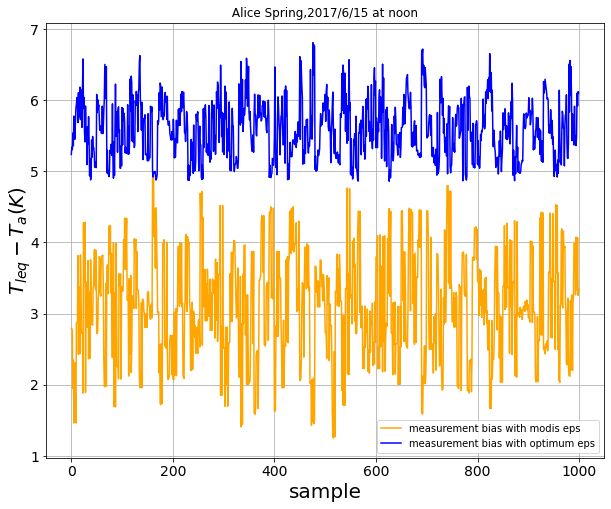

In [46]:
fig=plt.figure(figsize=(10,8))
plt.plot(consteps_12, color='orange')
plt.plot(opteps_12, color='blue')
plt.xlabel('sample', ha='center',fontsize=20)
plt.ylabel('$T_{leq} - T_{a}(K)$', labelpad=10, va='center',fontsize=20)
plt.legend(['measurement bias with modis eps','measurement bias with optimum eps'])
plottitle = ' Alice Spring,2017/6/15 at noon '
fname = 'Alice_spring_unc_leqcomp'
plt.title(plottitle)
plt.grid()



**opteps is showing error then const eps**

## comparing Ts -Ta box plot leq: unc with opteps and unc with consteps

## Ts value for optimum epsilon with measured fluxes without perturbation

In [47]:
#opteps_As_ref = pd.DataFrame(columns=["Hr","eps_opt","DT"])
def DT_loop (years, df_all,mnth,
                     xcol = 'DT', ycol = 'Fh',eqdigits=3, epsmin=0.6, epsmax=0.999, epsincr=0.002):
    
    k=0
    list_hr=[]
    list_dt1=[]
    hr_range=np.arange(8,17,1)
    epsilon1=0.86
    for ii in range(9):
        
        df = df_all[(df_all.index.year == 2017) & (df_all.index.month == mnth) & (df_all.index.day == 15)
            & (df_all.index.hour == hr_range[ii]) & (df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2) & (df_all.Fld_QCFlag==00) & (df_all.Flu_QCFlag==00)
            & (df_all.Ta_QCFlag==00) & (df_all.Fh_QCFlag==00)]
        #print(hr_range[ii])
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
            
           
        ####
        #try:
        list_T_s = tf_T_s((df.Fld),(df.Flu))
        df = df.assign(T_s=list_T_s)
            #list_DT = df.T_s - df.T_a
        list_DT1=df['T_s'].values         #-df['T_a'].values           
        #except ValueError:
        if not list_DT1:
            list_dt1.append(np.nan)
            list_hr.append(hr_range[ii])
        else:
            list_dt1.append(list_DT1)
            list_hr.append(hr_range[ii])
             
        git_dt=list_dt1.copy()
    
    #df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
   
    return git_dt,list_hr

        

## EGU 2021 only Tleq

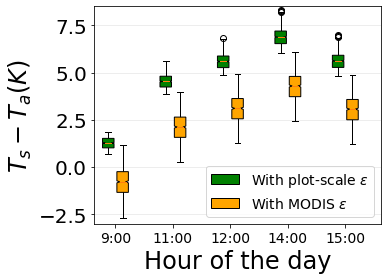

In [48]:
fig, ax1 = plt.subplots(figsize=(5,4))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.boxplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],1, widths = 0.2, patch_artist=True,
                positions=np.arange(0.25,5.25))
### box plot using short equation
box1=plt.boxplot([consteps_9.flatten(),consteps_11.flatten(),
                consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()
                  ]
                 ,1,widths = 0.2, patch_artist=True,
                 positions=np.arange(0.5,5.5))
               
               
               
               
plt.setp(box["boxes"], facecolor='green')
plt.setp(box1["boxes"], facecolor='orange')
#line1,=plt.plot(np.arange(0.25,5.25),y2, color='red', label='optimum epsilon',zorder=10)
plt.legend([box["boxes"][0],box1["boxes"][0]],["With plot-scale "+"$\epsilon$", "With MODIS "+"$\epsilon$"],
           loc="lower right", fontsize=14) 

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_ylabel(r'$T_{s} - T_{a} (K)$', ha='center',fontsize=24, fontweight='bold')
ax1.set_xlabel('Hour of the day', ha='center',fontsize=24)
numBoxes=5
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]
    med1 = box1['medians'][i]
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        #medians[i] = medianx[0]
# Set the axes ranges and axes labels
#eps=[0.985,0.983,0.974,0.985,0.984]#,0.974,0.985,0.985,0.983,0.974]
ax1.set_xlim(0, numBoxes)
top = 8.5
bottom = -3
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=20)
#xtickNames = plt.setp(ax1, xticklabels=("9",
                                      #  "11","12","14","15"))
#plt.setp(xtickNames, rotation=45, fontsize=12, fontweight='bold')

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"))
pos = np.arange(0.375,5.375)#np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    #ax1.text(pos[tick], top + 0.2, upperLabels[tick],
             #horizontalalignment='center', size='x-large', weight=weights[k],
             #color='b')
    #ax1.text(pos[tick], top + 0.75, upperLabels1[tick],
             #horizontalalignment='center', size='x-large', weight=weights[k],
             #color='orange')
    #ax1.text(pos[tick], bottom + 4, eps[tick],
            # horizontalalignment='center', size='x-large', weight=weights[k],
             #color='k')
plt.grid(axis='y')
plt.tight_layout()
fname = 'TsTa_leq_unc1_egu2021'
#plt.plot(np.arange(0.25,5.25),y2,'*')
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



        
        

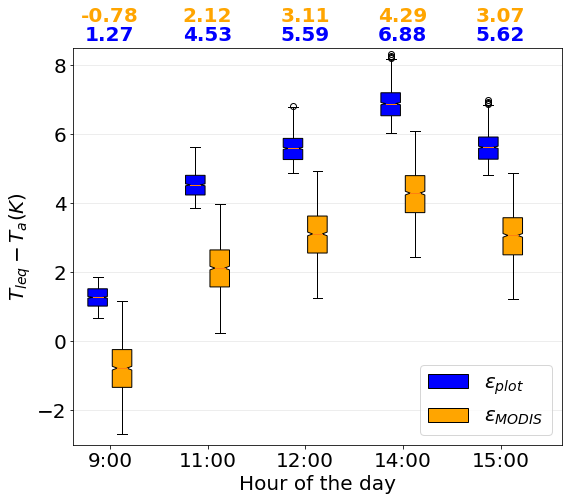

In [49]:
fig, ax1 = plt.subplots(figsize=(8,7))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.boxplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],1, widths = 0.2, patch_artist=True,
                positions=np.arange(0.25,5.25))
### box plot using short equation
box1=plt.boxplot([consteps_9.flatten(),consteps_11.flatten(),
                consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()
                  ]
                 ,1,widths = 0.2, patch_artist=True,
                 positions=np.arange(0.5,5.5))
               
               
               
               
plt.setp(box["boxes"], facecolor='blue')
plt.setp(box1["boxes"], facecolor='orange')
#line1,=plt.plot(np.arange(0.25,5.25),y2, color='red', label='optimum epsilon',zorder=10)
plt.legend([box["boxes"][0],box1["boxes"][0]],["$\epsilon_{plot}$", "$\epsilon_{MODIS}$"],
           loc="lower right", fontsize=20) 

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_ylabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
numBoxes=5
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]
    med1 = box1['medians'][i]
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        #medians[i] = medianx[0]
# Set the axes ranges and axes labels
#eps=[0.985,0.983,0.974,0.985,0.984]#,0.974,0.985,0.985,0.983,0.974]
ax1.set_xlim(0, numBoxes)
top = 8.5
bottom = -3
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=20)
#xtickNames = plt.setp(ax1, xticklabels=("9",
                                      #  "11","12","14","15"))
#plt.setp(xtickNames, rotation=45, fontsize=12, fontweight='bold')

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=20)
plt.yticks(fontsize=20)
pos = np.arange(0.375,5.375)#np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top + 0.2, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='b', fontsize=20)
    ax1.text(pos[tick], top + 0.75, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='orange', fontsize=20)
    #ax1.text(pos[tick], bottom + 4, eps[tick],
            # horizontalalignment='center', size='x-large', weight=weights[k],
             #color='k')
plt.grid(axis='y')
plt.tight_layout()
fname = 'TsTa_leq_unc1'
#plt.plot(np.arange(0.25,5.25),y2,'*')
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



        
        

## leq with intercept:

In [50]:
flux_unc_leq_intr=pd.read_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_leq_inter.csv')

In [51]:
mnth=6            #the best month is chosen using minimum r2 and rmse and mnth is equal to best mnth -1
k=mnth*1000
#print(k)
p=(mnth*1000)+1000
#print(p)
flux_unc_intr=flux_unc_leq_intr[k:p] 
#flux_unc_intr

## Ts _Ta estimation

In [52]:
flux_unc_intr['month'][ flux_unc_intr['unc_fld'] == '-4.033203' ]

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: month, dtype: float64)

In [53]:
flux_unc_intr

Unnamed: 0    year  month      unc_h   unc_fld   unc_flu    unc_ta  \
6000        6000  2017.0    7.0 -11.210938 -4.033203  0.185547  0.353516   
6001        6001  2017.0    7.0  -8.789062 -4.033203  0.185547  0.353516   
6002        6002  2017.0    7.0 -11.210938  4.072266  0.185547  0.353516   
6003        6003  2017.0    7.0 -11.210938 -4.033203 -4.541016  0.353516   
6004        6004  2017.0    7.0 -11.210938 -4.033203  0.185547  0.798828   
...          ...     ...    ...        ...       ...       ...       ...   
6995        6995  2017.0    7.0  -1.503906  2.270508 -3.442383 -0.872070   
6996        6996  2017.0    7.0  18.847656  0.874023 -3.442383 -0.872070   
6997        6997  2017.0    7.0  18.847656  2.270508  0.649414 -0.872070   
6998        6998  2017.0    7.0  18.847656  2.270508 -3.442383 -0.791992   
6999        6999  2017.0    7.0  18.847656  2.270508 -3.442383 -0.872070   

        eps  
6000  0.906  
6001  0.906  
6002  0.906  
6003  0.910  
6004  0.906  
...     ...  
6995  0.910  
6996  0.910  
6997  0.906  
6998  0.910  
6999  0.910  

[1000 rows x 8 columns]

In [54]:
### for one day
df_all=HWframe.copy()
df_err=flux_unc_intr.copy()

hr_range=np.arange(8,17,1)   ## 8 am to 5 pm
dt_unc_intr=[]
jj=0

#epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
for ii in range(9):
    df = df_all[(df_all.index.year == 2017)&(df_all.index.month == 7)&(df_all.index.day == 15)
                &(df_all.index.hour == hr_range[ii])&(df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2)&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    print(df)
    for j in range(1000) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, df_err.eps[k+j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                          
        

        list_H=df.Fh+df_err.unc_h[k+j]
        #print(list_H)
        
        df = df.assign(H=list_H)
        Fld=df.Fld+df_err.unc_fld[k+j]
        Flu=df.Flu+df_err.unc_flu[k+j]
        list_T_s = tf_T_s(Fld,Flu)
        
        
        df = df.assign(T_s=list_T_s)
        list_DT= df.T_s - (df.T_a+df_err.unc_ta[k+j])
        df = df.assign(DT=list_DT)
        
        dt_unc_intr.append(list_DT)
        

Empty DataFrame
Columns: [longitute, latitute, time, Day, Day_QCFlag, Hdh, Hdh_QCFlag, Hour, Hour_QCFlag, Minute, Minute_QCFlag, Month, Month_QCFlag, Second, Second_QCFlag, Year, Year_QCFlag, xlDateTime, xlDateTime_QCFlag, AGC_7500, AGC_7500_QCFlag, Ah, Ah_QCFlag, AhAh, AhAh_QCFlag, Ah_200cm, Ah_200cm_QCFlag, Ah_425cm, Ah_425cm_QCFlag, Ah_657cm, Ah_657cm_QCFlag, Ah_7500_Av, Ah_7500_Av_QCFlag, Ah_Sd, Ah_Sd_QCFlag, CA, CA_QCFlag, C_Sd, C_Sd_QCFlag, C_ppm, C_ppm_QCFlag, Cc, Cc_QCFlag, CcCc, CcCc_QCFlag, Cc_7500_Av, Cc_7500_Av_QCFlag, Ce_base, Ce_base_QCFlag, Ce_full, Ce_full_QCFlag, Ce_top, Ce_top_QCFlag, Diag_7500, Diag_7500_QCFlag, Diag_CSAT, Diag_CSAT_QCFlag, Diag_WS4, Diag_WS4_QCFlag, ET, ET_QCFlag, Fa, Fa_QCFlag, Fc, Fc_QCFlag, Fc_c, Fc_c_QCFlag, Fc_co2, Fc_co2_QCFlag, Fe, Fe_QCFlag, Fg, Fg_QCFlag, Fg_bs, Fg_bs_QCFlag, Fg_ms, Fg_ms_QCFlag, Fg_mu, Fg_mu_QCFlag, Fh, Fh_QCFlag, Fld, Fld_QCFlag, Fld_02, Fld_02_QCFlag, Flu, Flu_QCFlag, Flu_02, Flu_02_QCFlag, Fm, Fm_QCFlag, Fn, Fn_QCFlag, 

Empty DataFrame
Columns: [longitute, latitute, time, Day, Day_QCFlag, Hdh, Hdh_QCFlag, Hour, Hour_QCFlag, Minute, Minute_QCFlag, Month, Month_QCFlag, Second, Second_QCFlag, Year, Year_QCFlag, xlDateTime, xlDateTime_QCFlag, AGC_7500, AGC_7500_QCFlag, Ah, Ah_QCFlag, AhAh, AhAh_QCFlag, Ah_200cm, Ah_200cm_QCFlag, Ah_425cm, Ah_425cm_QCFlag, Ah_657cm, Ah_657cm_QCFlag, Ah_7500_Av, Ah_7500_Av_QCFlag, Ah_Sd, Ah_Sd_QCFlag, CA, CA_QCFlag, C_Sd, C_Sd_QCFlag, C_ppm, C_ppm_QCFlag, Cc, Cc_QCFlag, CcCc, CcCc_QCFlag, Cc_7500_Av, Cc_7500_Av_QCFlag, Ce_base, Ce_base_QCFlag, Ce_full, Ce_full_QCFlag, Ce_top, Ce_top_QCFlag, Diag_7500, Diag_7500_QCFlag, Diag_CSAT, Diag_CSAT_QCFlag, Diag_WS4, Diag_WS4_QCFlag, ET, ET_QCFlag, Fa, Fa_QCFlag, Fc, Fc_QCFlag, Fc_c, Fc_c_QCFlag, Fc_co2, Fc_co2_QCFlag, Fe, Fe_QCFlag, Fg, Fg_QCFlag, Fg_bs, Fg_bs_QCFlag, Fg_ms, Fg_ms_QCFlag, Fg_mu, Fg_mu_QCFlag, Fh, Fh_QCFlag, Fld, Fld_QCFlag, Fld_02, Fld_02_QCFlag, Flu, Flu_QCFlag, Flu_02, Flu_02_QCFlag, Fm, Fm_QCFlag, Fn, Fn_QCFlag, 

In [55]:
 # dt_unc_intr

In [56]:
intreps_8=np.array(dt_unc_intr[0:1000])
intreps_9=np.array(dt_unc_intr[1000:2000])
intreps_10=np.array(dt_unc_intr[2000:3000])
intreps_11=np.array(dt_unc_intr[3000:4000])
intreps_12=np.array(dt_unc_intr[4000:5000])
intreps_13=np.array(dt_unc_intr[5000:6000])
intreps_14=np.array(dt_unc_intr[6000:7000])
intreps_15=np.array(dt_unc_intr[7000:8000])
intreps_16=np.array(dt_unc_intr[8000:9000])



In [57]:
#intreps_12

## TWo leq

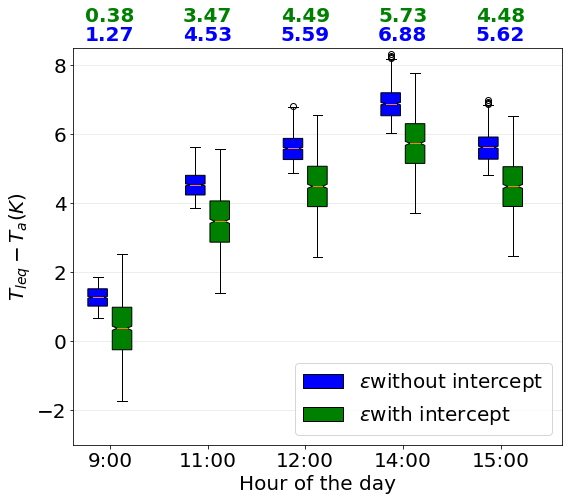

In [58]:
fig, ax1 = plt.subplots(figsize=(8,7))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.boxplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],1, widths = 0.2, patch_artist=True,
                positions=np.arange(0.25,5.25))
### box plot using short equation
box1=plt.boxplot([intreps_9.flatten(),intreps_11.flatten(),
                intreps_12.flatten(),intreps_14.flatten(),intreps_15.flatten()]
                 ,1,widths = 0.2, patch_artist=True,
                 positions=np.arange(0.5,5.5))
               
               
               
               
plt.setp(box["boxes"], facecolor='blue')
plt.setp(box1["boxes"], facecolor='green')
#line1,=plt.plot(np.arange(0.25,5.25),y2, color='red', label='optimum epsilon',zorder=10)
plt.legend([box["boxes"][0],box1["boxes"][0]],["$\epsilon$"+"without intercept", 
                            "$\epsilon$"+"with intercept"],loc="lower right",fontsize=20) 

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_ylabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
numBoxes=5
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]
    med1 = box1['medians'][i]
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        #medians[i] = medianx[0]
# Set the axes ranges and axes labels
#eps=[0.985,0.983,0.974,0.985,0.984]#,0.974,0.985,0.985,0.983,0.974]
ax1.set_xlim(0, numBoxes)
top = 8.5
bottom = -3
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=14)
#xtickNames = plt.setp(ax1, xticklabels=("9",
                                      #  "11","12","14","15"))
#plt.setp(xtickNames, rotation=45, fontsize=12, fontweight='bold')

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=20)
plt.yticks(fontsize=20)
pos = np.arange(0.375,5.375)#np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top + 0.2, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='b', fontsize=20)
    ax1.text(pos[tick], top + 0.75, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='green',fontsize=20)
    #ax1.text(pos[tick], bottom + 4, eps[tick],
            # horizontalalignment='center', size='x-large', weight=weights[k],
             #color='k')
plt.grid(axis='y')
plt.tight_layout()
fname = 'Tsta_leq_intrc'
#plt.plot(np.arange(0.25,5.25),y2,'*')
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



        
        

## Voilon Plot

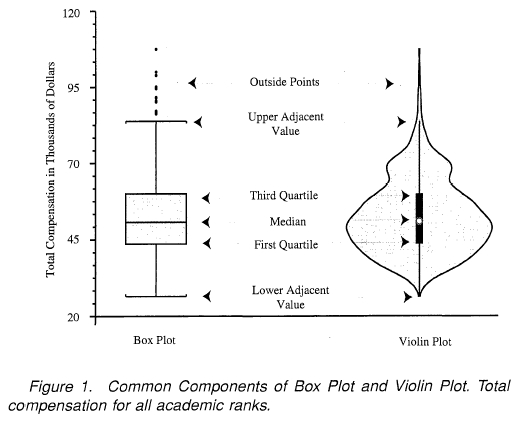

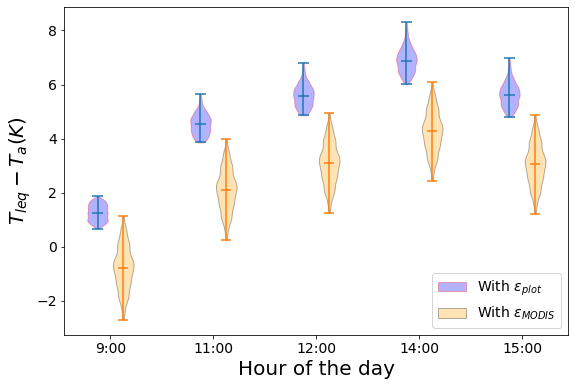

In [59]:
fig, ax1 = plt.subplots(figsize=(8,7))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.violinplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],widths=0.2,positions=np.arange(0.25,5.25),showmedians=True)
### box plot using short equation
box1=plt.violinplot([consteps_9.flatten(),consteps_11.flatten(),
                consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()],
                  widths=0.2,positions=np.arange(0.5,5.5),showmedians=True)

plt.setp(box["bodies"], color='b')
plt.setp(box1["bodies"], color='orange')
plt.setp(box["bodies"], facecolor='blue')
plt.setp(box1["bodies"], facecolor='orange')
plt.setp(box["bodies"], edgecolor='red')
plt.setp(box1["bodies"], edgecolor='black')
#line1,=plt.plot(np.arange(0.25,5.25),y2, color='red', label='optimum epsilon',zorder=10)
plt.legend([box["bodies"][0],box1["bodies"][0]],["With "+"$\epsilon_{plot}$", "With "+"$\epsilon_{MODIS}$"],
           loc="lower right", fontsize=14) 
plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=14)
ax1.set_ylabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
numBoxes=5
medians=list(range(numBoxes))
medians1=list(range(numBoxes))


In [60]:
import plotly.graph_objects as go

In [61]:
import plotly.offline as pypl
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
#import plotly.graph_objs as go
init_notebook_mode()

In [62]:
len(opteps_9)

1000

In [63]:
[9]*5

[9, 9, 9, 9, 9]

In [64]:
xx=[9,11,12,14,15]

pointpos_male = [-0.9,-1.1,-0.6,-0.3,-0.5]
pointpos_female = [0.45,0.55,1,0.4,0.6]
show_legend = [True,False,False,False,False]
fig = go.Figure()

with_eplot=[opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),opteps_14.flatten(),opteps_15.flatten()]
with_emodis=[consteps_9.flatten(),consteps_11.flatten(),consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()]
for i in range(0,len(xx)):
    fig.add_trace(go.Violin(x=[xx[i]]*len(with_eplot[i]),y=with_eplot[i],
                            legendgroup='Plot', scalegroup='Plot', name='Plot',
                            side='negative',
                            line_color='blue',
                            pointpos=pointpos_male[i],
                            showlegend=show_legend[i],
                            
                            
                            )
             )
    fig.add_trace(go.Violin(x=[xx[i]]*len(with_emodis[i]),y=with_emodis[i],
                            legendgroup='', scalegroup='MODIS', name='MODIS',
                            side='positive',
                            line_color='orange',
                            pointpos=pointpos_female[i],
                            showlegend=show_legend[i]
                            )
             )

# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,)
                  #points='all', # show all points
                  #jitter=0.05,  # add some jitter on points for better visibility
                  #scalemode='count') #scale violin plot area with total count
fig.update_layout(
    title_text="Ts-Ta uncertainity using leq ",
    violingap=0, violingroupgap=0, violinmode='overlay',
    plot_bgcolor='rgba(0,0,0,0)',
    autosize=False,
    width=1000,
    height=500)
fig.update_xaxes(type='category')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black',tickfont_size=20)
fig.update_xaxes(title_text='Hour of the day')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_size=20)
fig.update_yaxes(title_text=r'$T_{s}$')
fig.show()
plot_url = pypl.plot(fig, filename='latex', include_mathjax='cdn')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `latex` didn't end with .html. Adding .html to the end of your file.



Text(0.5, 0, 'Hour of the day')

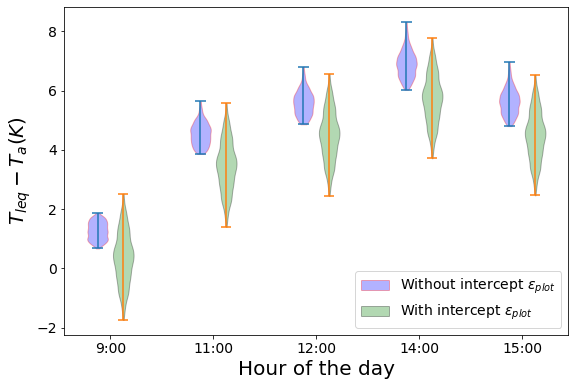

In [65]:
fig, ax1 = plt.subplots(figsize=(8,7))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.violinplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],widths=0.2,positions=np.arange(0.25,5.25))
### box plot using short equation
box1=plt.violinplot([intreps_9.flatten(),intreps_11.flatten(),
                intreps_12.flatten(),intreps_14.flatten(),intreps_15.flatten()]
                 ,widths = 0.2,positions=np.arange(0.5,5.5))

plt.setp(box["bodies"], color='blue')
plt.setp(box1["bodies"], color='green')
plt.setp(box["bodies"], facecolor='blue')
plt.setp(box1["bodies"], facecolor='green')
plt.setp(box["bodies"], edgecolor='red')
plt.setp(box1["bodies"], edgecolor='black')
#line1,=plt.plot(np.arange(0.25,5.25),y2, color='red', label='optimum epsilon',zorder=10)
plt.legend([box["bodies"][0],box1["bodies"][0]],["Without intercept "+"$\epsilon_{plot}$", "With intercept "+"$\epsilon_{plot}$"],
           loc="lower right", fontsize=14) 
plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=14)
ax1.set_ylabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)


## Ts Ta uncertainity using short equation:

In [66]:
flux_unc_seq=pd.read_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_corr_seq.csv')

In [67]:
mnth=6            #the best month is chosen using minimum r2 and rmse and mnth is equal to best mnth -1
k1=mnth*800
#print(k)
p1=(mnth*800)+800
#print(p)
flux_unc_seq1=flux_unc_seq[k1:p1] 
#flux_unc_seq1

In [68]:
df_all=HWframe.copy()
df_err_seq=flux_unc_seq1.copy()
#df_err_seq

## for one day using seq

In [69]:
Dt_err = pd.DataFrame(columns=["DT_unc"])### for one day
df_all=HWframe.copy()
df_err=df_err_seq.copy()
dt_unc_seq=[]
hr_range=np.arange(8,17,1)

jj=0  
for ii in range(9): 
    df = df_all[(df_all.index.year == 2017)&(df_all.index.month == 7)  &(df_all.index.day == 15)&
                (df_all.index.hour == hr_range[ii])&(df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)&(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    for j in range(800) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, df_err.eps[k1+j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                        
        
        
        list_H=df.Fh+df_err.unc_h[k1+j]
        df = df.assign(H=list_H)
        #Fld=df.Fld+unc_Fld
        Flu=df.Flu+df_err.unc_flu[k1+j]
        list_T_s1 = tf_T_s1(Flu)
        
        df = df.assign(T_s1=list_T_s1)
        list_DT1 = df.T_s1 - (df.T_a+df_err.unc_ta[k1+j])
        df = df.assign(DT1=list_DT1)        
        dt_unc_seq.append(list_DT1)
        

## using MoDIs epsilon:

In [70]:
Dt_err = pd.DataFrame(columns=["DT_unc"])### for one day
df_all=HWframe.copy()
df_err=df_err_seq.copy()
dt_uncconst_seq=[]
hr_range=np.arange(8,17,1)
epsilon1=0.972

jj=0  
for ii in range(9):
    df = df_all[(df_all.index.year == 2017)&(df_all.index.month == 7)  &(df_all.index.day == 15)
            &(df_all.index.hour == hr_range[ii])&(df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2)&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
            &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
   
    for j in range(800) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                        
        
        
        list_H=df.Fh+df_err.unc_h[k1+j]
        df = df.assign(H=list_H)
        #Fld=df.Fld+unc_Fld
        Flu=df.Flu+df_err.unc_flu[k1+j]
        list_T_s1 = tf_T_s1(Flu)
        
        df = df.assign(T_s1=list_T_s1)
        list_DT1 = df.T_s1 - (df.T_a+df_err.unc_ta[k1+j])
        df = df.assign(DT1=list_DT1)        
        dt_uncconst_seq.append(list_DT1)
    

In [71]:
print(len(dt_uncconst_seq))

7200


In [72]:
consteps1_8=np.array(dt_uncconst_seq[0:800])
consteps1_9=np.array(dt_uncconst_seq[800:1600])
consteps1_10=np.array(dt_uncconst_seq[1600:2400])
consteps1_11=np.array(dt_uncconst_seq[2400:3200])
consteps1_12=np.array(dt_uncconst_seq[3200:4000])
consteps1_13=np.array(dt_uncconst_seq[4000:4800])
consteps1_14=np.array(dt_uncconst_seq[4800:5600])
consteps1_15=np.array(dt_uncconst_seq[5600:6400])
consteps1_16=np.array(dt_uncconst_seq[6400:7200])




In [73]:
opteps1_8=np.array(dt_unc_seq[0:800])
opteps1_9=np.array(dt_unc_seq[800:1600])
opteps1_10=np.array(dt_unc_seq[1600:2400])
opteps1_11=np.array(dt_unc_seq[2400:3200])
opteps1_12=np.array(dt_unc_seq[3200:4000])
opteps1_13=np.array(dt_unc_seq[4000:4800])
opteps1_14=np.array(dt_unc_seq[4800:5600])
opteps1_15=np.array(dt_unc_seq[5600:6400])
opteps1_16=np.array(dt_unc_seq[6400:7200])



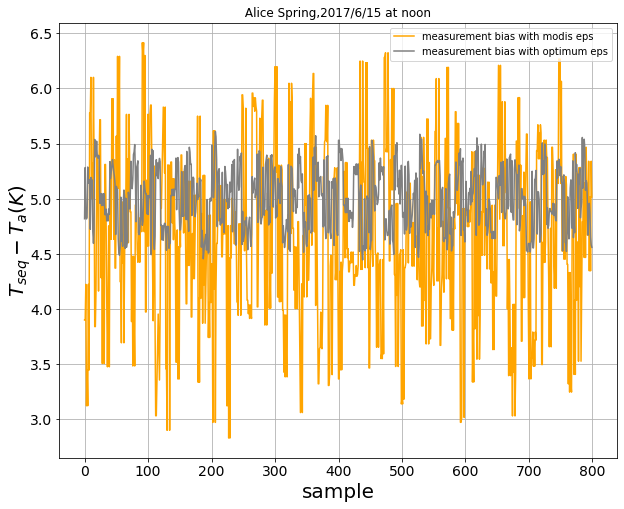

In [74]:
fig=plt.figure(figsize=(10,8))
plt.plot(consteps1_12, color='orange')
plt.plot(opteps1_12, color='grey')
plt.xlabel('sample', ha='center',fontsize=20)
plt.ylabel('$T_{seq} - T_{a}(K)$', labelpad=10, va='center',fontsize=20)
plt.legend(['measurement bias with modis eps','measurement bias with optimum eps'])
plottitle = ' Alice Spring,2017/6/15 at noon '
fname = 'Alice_spring_unc_comp'
plt.title(plottitle)
plt.grid()


## Tseq - Ta box plot with uncertainity

## without perturbation:

In [75]:
#opteps_As_ref = pd.DataFrame(columns=["Hr","eps_opt","DT"])
def DT_loop_1 (years, df_all,mnth,
                     xcol = 'DT', ycol = 'Fh',eqdigits=3, epsmin=0.6, epsmax=0.999, epsincr=0.002):
    
    k=0
    list_hr=[]
    list_dt1=[]
    hr_range=np.arange(8,17,1)
    epsilon1=0.968 #optimum epsilon for 7th month
    for ii in range(9):
        
        df = df_all[(df_all.index.year == 2017) & (df_all.index.month == mnth) & (df_all.index.day == 15)
            & (df_all.index.hour == hr_range[ii]) & (df_all.index.minute == 0)
            & (df_all.Fn > 25) & (df_all.Ws > 2) & (df_all.Fld_QCFlag==00) & (df_all.Flu_QCFlag==00)
            & (df_all.Ta_QCFlag==00) & (df_all.Fh_QCFlag==00)]
        #print(hr_range[ii])
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_DT1=df['T_s1'].values-df['T_a'].values 
        
            #list_DT = df.T_s - df.T_a
                  
        #except ValueError:
        if not list_DT1:
            list_dt1.append(np.nan)
            list_hr.append(hr_range[ii])
        else:
            list_dt1.append(list_DT1)
            list_hr.append(hr_range[ii])
             
        opt_dt=list_dt1.copy()
    
    #df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
   
    return opt_dt,list_hr

        

In [76]:
#DT_loop_1(2017,HWframe,7)

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[nan, array([1.11274407]), nan, array([3.96557005]), array([4.95313815]), nan, array([6.12521864]), array([4.91061609]), nan]


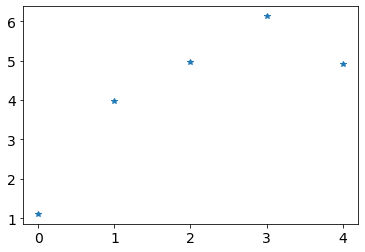

In [77]:
y1_1=DT_loop_1(2017,HWframe,7)[0]
y2_1=[y3 for y3 in y1_1 if str(y3) != 'nan']
x1_1=DT_loop_1(2017,HWframe,7)[1]

#x2=[arr.tolist() for arr in x1]
#x=x1.flatten()
#x2=flatten(x2)
print(y1_1)

#

plt.plot(y2_1,'*')

## Ts - Ta box plot

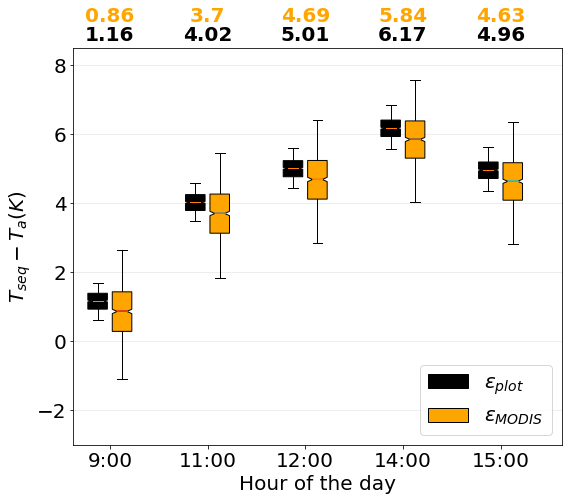

In [78]:
fig, ax1 = plt.subplots(figsize=(8, 7))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

#plt.plot([0.75,1.75,2.75,3.75,4.75],y2_1,'*', color='g',label='opt DT using measured fluxes') 
box=ax1.boxplot([opteps1_9.flatten(),opteps1_11.flatten(),opteps1_12.flatten(),
                opteps1_14.flatten(),opteps1_15.flatten()],1,widths=0.2,patch_artist=True,
                positions=np.arange(0.25,5.25),zorder=2)
### box plot using short equation
box1=ax1.boxplot([consteps1_9.flatten(),consteps1_11.flatten(),
                consteps1_12.flatten(),consteps1_14.flatten(),consteps1_15.flatten()
                  ]
                 ,1, widths=0.2,patch_artist=True,
                 positions=np.arange(0.5,5.5),zorder=1)
               
               
               
              
plt.setp(box["boxes"], facecolor='black')
plt.setp(box1["boxes"], facecolor='orange')
#line1,=ax1.plot(np.arange(0.25,5.25),y2_1, color='green', label='optimum epsilon',zorder=10)
#ax1.plot(y2_1.values,'r-o',linewidth=4)
plt.legend([box["boxes"][0],box1["boxes"][0]],[ "$\epsilon_{plot}$", "$\epsilon_{MODIS}$"],
           loc="lower right", fontsize=20) 

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_ylabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
numBoxes=5
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]
    med1 = box1['medians'][i]
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        #medians[i] = medianx[0]
# Set the axes ranges and axes labels
#eps=[0.985,0.983,0.974,0.985,0.984]#,0.974,0.985,0.985,0.983,0.974]
ax1.set_xlim(0, numBoxes)
top = 8.5
bottom = -3
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=14)
#xtickNames = plt.setp(ax1, xticklabels=("9",
                                      #  "11","12","14","15"))
#plt.setp(xtickNames, rotation=45, fontsize=12, fontweight='bold')

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=20)
plt.yticks(fontsize=20)
pos = np.arange(0.375,5.375)#np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top + 0.2, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='k', fontsize=20)
    ax1.text(pos[tick], top + 0.75, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='orange', fontsize=20)
    #ax1.text(pos[tick], bottom + 4, eps[tick],
            # horizontalalignment='center', size='x-large', weight=weights[k],
             #color='k')
plt.grid(axis='y')
fname = 'TsTa_seq_unc1'
#plt.plot(np.arange(0.25,5.25),y2,'*')
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



        

fig=plt.figure(figsize=(10,8))
box=plt.boxplot(Dt_err.DT_unc)
box1=plt.boxplot(Dt_err_const.DT_unc_const )
plt.setp(box1, facecolor='orange')## using MODIS epsilon
plt.setp(box, facecolor='blue') 
plt.xticks(rotation=45)
plt.xlabel('sample', ha='center',fontsize=20)
plt.ylabel('Ts -Ta(K)', labelpad=10, va='center',fontsize=20)
plt.legend(['measurement bias with optimum eps','measurement bias with modis eps'])
plottitle = ' Alice Spring,2017/1/10 at noon '
fname = 'Alice_spring_unc_comp'
plt.title(plottitle)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

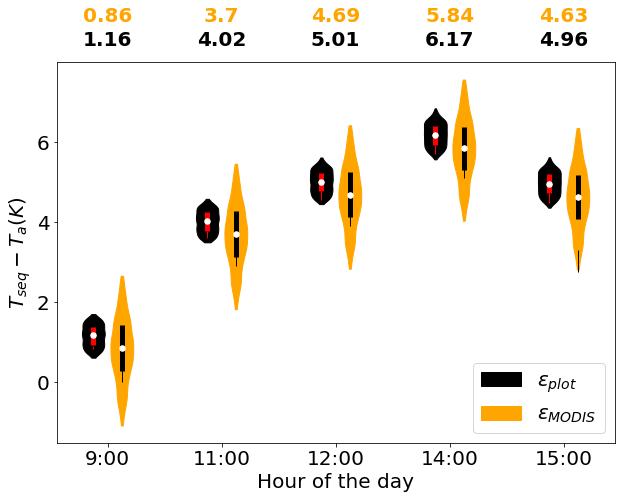

In [95]:
fig, ax1 = plt.subplots(figsize=(10, 7))

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')








box=ax1.violinplot([opteps1_9.flatten(),opteps1_11.flatten(),opteps1_12.flatten(),
                opteps1_14.flatten(),opteps1_15.flatten()],widths=0.2,
                positions=np.arange(0.25,5.25), showmedians=False,showmeans=False,
        showextrema=False)
### box plot using short equation
box1=ax1.violinplot([consteps1_9.flatten(),consteps1_11.flatten(),
                consteps1_12.flatten(),consteps1_14.flatten(),consteps1_15.flatten()
                  ],widths=0.2,positions=np.arange(0.5,5.5),showmedians=False,showmeans=False,
        showextrema=False)





for pc in box['bodies']:
    pc.set_facecolor('k')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile([opteps1_9.flatten(),opteps1_11.flatten(),opteps1_12.flatten(),
                opteps1_14.flatten(),opteps1_15.flatten()], [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([opteps1_9.flatten(),opteps1_11.flatten(),opteps1_12.flatten(),
                opteps1_14.flatten(),opteps1_15.flatten()], quartile1, quartile3)])

whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0.25,5.25)#np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='red', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='red', linestyle='-', lw=1)

for pc in box1['bodies']:
    pc.set_facecolor('orange')
    pc.set_edgecolor('orange')
    pc.set_alpha(1)
# set style for the axes
quartile11, medians1, quartile31 = np.percentile([consteps1_9.flatten(),consteps1_11.flatten(),
                consteps1_12.flatten(),consteps1_14.flatten(),consteps1_15.flatten()], [25, 50, 75], axis=1)

whiskers1 = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([consteps1_9.flatten(),consteps1_11.flatten(),
                consteps1_12.flatten(),consteps1_14.flatten(),consteps_15.flatten()], quartile11, quartile31)])
whiskers_min1, whiskers_max1 = whiskers1[:, 0], whiskers1[:, 1]

inds1 = np.arange(0.5,5.5)#np.arange(1, len(medians1) + 1)
ax1.scatter(inds1, medians1, marker='o', color='white', s=30, zorder=3)
ax1.vlines(inds1, quartile11, quartile31, color='black', linestyle='-', lw=5)
ax1.vlines(inds1, whiskers_min1, whiskers_max1, color='black', linestyle='-', lw=1)

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=20)
plt.yticks(fontsize=20)

ax1.set_ylabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
ax1.legend([box["bodies"][0],box1["bodies"][0]],[ "$\epsilon_{plot}$", "$\epsilon_{MODIS}$"],
           loc="lower right", fontsize=20) 

upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
pos = np.arange(0.375,5.375)
weights = ['bold', 'semibold']
top = 8
bottom = -3
for tick, label in zip(range(5), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top + 0.4, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='black', fontsize=20)
    ax1.text(pos[tick], top + 1, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='orange', fontsize=20)

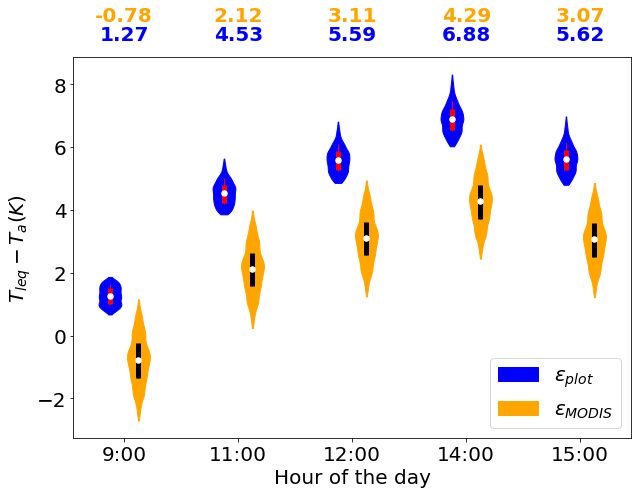

In [94]:
fig, ax1 = plt.subplots(figsize=(10, 7))

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

#with_eplot=[opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),opteps_14.flatten(),opteps_15.flatten()]
#with_emodis=[consteps_9.flatten(),consteps_11.flatten(),consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()]

box=ax1.violinplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],widths=0.2,positions=np.arange(0.25,5.25),
                   showmedians=False,showmeans=False,
        showextrema=False)
### box plot using short equation
box1=ax1.violinplot([consteps_9.flatten(),consteps_11.flatten(),
                consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()],
                  widths=0.2,positions=np.arange(0.5,5.5),showmedians=False,showmeans=False,
        showextrema=False)


for pc in box['bodies']:
    pc.set_facecolor('b')
    pc.set_edgecolor('b')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()], [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()], quartile1, quartile3)])

whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0.25,5.25)#np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='red', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='red', linestyle='-', lw=1)

for pc in box1['bodies']:
    pc.set_facecolor('orange')
    pc.set_edgecolor('orange')
    pc.set_alpha(1)
# set style for the axes
quartile11, medians1, quartile31 = np.percentile([consteps_9.flatten(),consteps_11.flatten(),
                consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()], [25, 50, 75], axis=1)

whiskers1 = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([consteps_9.flatten(),consteps_11.flatten(),
                consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()], quartile11, quartile31)])
whiskers_min1, whiskers_max1 = whiskers1[:, 0], whiskers1[:, 1]

inds1 = np.arange(0.5,5.5)#np.arange(1, len(medians1) + 1)
ax1.scatter(inds1, medians1, marker='o', color='white', s=30, zorder=3)
ax1.vlines(inds1, quartile11, quartile31, color='black', linestyle='-', lw=5)
ax1.vlines(inds1, whiskers_min1, whiskers_max1, color='black', linestyle='-', lw=1)

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=20)
plt.yticks(fontsize=20)

ax1.set_ylabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
ax1.legend([box["bodies"][0],box1["bodies"][0]],[ "$\epsilon_{plot}$", "$\epsilon_{MODIS}$"],
           loc="lower right", fontsize=20) 

upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
pos = np.arange(0.375,5.375)
weights = ['bold', 'semibold']
top = 9
bottom = -3
for tick, label in zip(range(5), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top + 0.4, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='blue', fontsize=20)
    ax1.text(pos[tick], top + 1, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='orange', fontsize=20)

## Long eq with intercept:

In [ ]:
box=plt.boxplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],1, widths = 0.2, patch_artist=True,
                positions=np.arange(0.25,5.25))
### box plot using short equation
box1=plt.boxplot([intreps_9.flatten(),intreps_11.flatten(),
                intreps_12.flatten(),intreps_14.flatten(),intreps_15.flatten()]
                 ,1,widths = 0.2, patch_artist=True,
                 positions=np.arange(0.5,5.5))

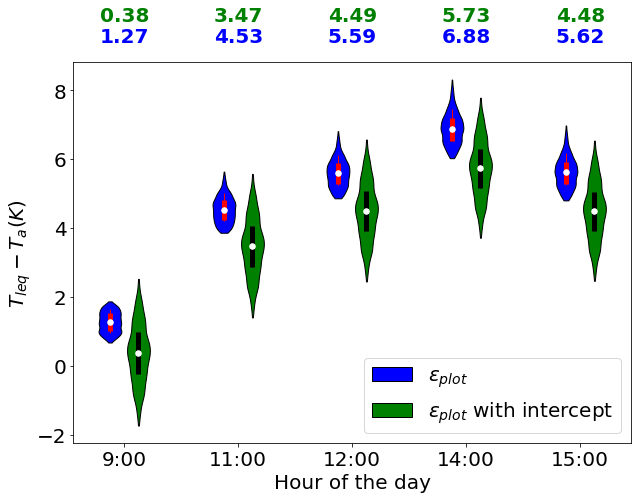

In [92]:
fig, ax1 = plt.subplots(figsize=(10, 7))

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


box=ax1.violinplot([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()],widths=0.2,positions=np.arange(0.25,5.25),
                   showmedians=False,showmeans=False,showextrema=False)
### box plot using short equation
box1=ax1.violinplot([intreps_9.flatten(),intreps_11.flatten(),
                intreps_12.flatten(),intreps_14.flatten(),intreps_15.flatten()],
                  widths=0.2,positions=np.arange(0.5,5.5),showmedians=False,showmeans=False,showextrema=False)


for pc in box['bodies']:
    pc.set_facecolor('b')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()], [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([opteps_9.flatten(),opteps_11.flatten(),opteps_12.flatten(),
                opteps_14.flatten(),opteps_15.flatten()], quartile1, quartile3)])

whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0.25,5.25)#np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='red', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='red', linestyle='-', lw=1)

for pc in box1['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
# set style for the axes
quartile11, medians1, quartile31 = np.percentile([intreps_9.flatten(),intreps_11.flatten(),
                intreps_12.flatten(),intreps_14.flatten(),intreps_15.flatten()], [25, 50, 75], axis=1)

whiskers1 = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([intreps_9.flatten(),intreps_11.flatten(),
                intreps_12.flatten(),intreps_14.flatten(),intreps_15.flatten()], quartile11, quartile31)])
whiskers_min1, whiskers_max1 = whiskers1[:, 0], whiskers1[:, 1]

inds1 = np.arange(0.5,5.5)#np.arange(1, len(medians1) + 1)
ax1.scatter(inds1, medians1, marker='o', color='white', s=30, zorder=3)
ax1.vlines(inds1, quartile11, quartile31, color='black', linestyle='-', lw=5)
ax1.vlines(inds1, whiskers_min1, whiskers_max1, color='black', linestyle='-', lw=1)

plt.xticks(np.arange(0.375,5.375), ("9:00","11:00","12:00","14:00","15:00"),fontsize=20)
plt.yticks(fontsize=20)

ax1.set_ylabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
ax1.set_xlabel('Hour of the day', ha='center',fontsize=20)
ax1.legend([box["bodies"][0],box1["bodies"][0]],[ "$\epsilon_{plot}$", "$\epsilon_{plot}$ with intercept"],
           loc="lower right", fontsize=20) 

upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
pos = np.arange(0.375,5.375)
weights = ['bold', 'semibold']
top = 9
bottom = -3
for tick, label in zip(range(5), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top + 0.4, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='blue', fontsize=20)
    ax1.text(pos[tick], top + 1, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='green', fontsize=20)
               
               

In [82]:
import seaborn as sns

In [83]:
data=[[9]*len(with_eplot[1]),with_eplot[1]]
#print(data)

In [ ]:
xx=[9,11,12,14,15]

pointpos_male = [-0.9,-1.1,-0.6,-0.3,-0.5]
pointpos_female = [0.45,0.55,1,0.4,0.6]
show_legend = [True,False,False,False,False]
fig = go.Figure()

with_eplot=[[opteps1_9.flatten(),opteps1_11.flatten(),opteps1_12.flatten(),
                opteps1_14.flatten(),opteps1_15.flatten()]
with_emodis=[consteps_9.flatten(),consteps_11.flatten(),consteps_12.flatten(),consteps_14.flatten(),consteps_15.flatten()]
for i in range(0,len(xx)):
            
           
    fig.add_trace(go.Violin(x=[xx[i]]*len(with_eplot[i]),y=with_eplot[i],
                            legendgroup='Plot', scalegroup='Plot', name='Plot',
                            side='negative',
                            line_color='blue',
                            pointpos=pointpos_male[i],
                            showlegend=show_legend[i],
                            
                            
                            )
             )
    fig.add_trace(go.Violin(x=[xx[i]]*len(with_emodis[i]),y=with_emodis[i],
                            legendgroup='', scalegroup='MODIS', name='MODIS',
                            side='positive',
                            line_color='orange',
                            pointpos=pointpos_female[i],
                            showlegend=show_legend[i]
                            )
             )

# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,)
                  #points='all', # show all points
                  #jitter=0.05,  # add some jitter on points for better visibility
                  #scalemode='count') #scale violin plot area with total count
fig.update_layout(
    title_text="Ts-Ta comparison",
    violingap=0, violingroupgap=0, violinmode='overlay',
    plot_bgcolor='rgba(0,0,0,0)',
    autosize=False,
    width=1000,
    height=500)
fig.update_xaxes(type='category')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black',tickfont_size=20)
fig.update_xaxes(title_text='Hour of the day')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_size=20)
fig.update_yaxes(title_text=r'$T_{s}$')
fig.show()
plot_url = pypl.plot(fig, filename='latex', include_mathjax='cdn')